In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style = "white" , color_codes=True , font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_train = df_train.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis =1)

In [9]:
df_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [10]:
def age_aprox(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else :
            return 24
        
    else: return Age

In [11]:
df_train["Age"] = df_train[["Age", "Pclass"]].apply(age_aprox,axis = 1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [13]:
df_train.dropna(inplace = True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

# Use Dummies
* The get_dummies function is used to convert categorical variables into dummy or indicator variables.
* A dummy or indicator variable can have a value of 0 or 1.

In [15]:
df_train_dummied = pd.get_dummies(df_train , columns = ["Sex"])


In [16]:
df_train_dummied = pd.get_dummies(df_train_dummied , columns = ["Embarked"])

In [17]:
df_train_dummied.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot: >

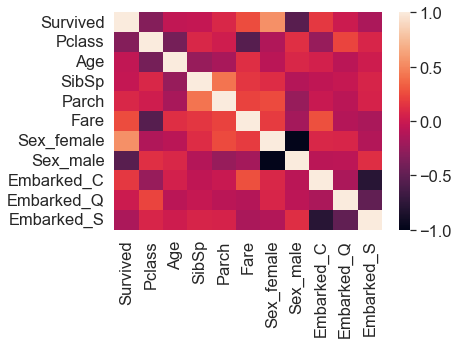

In [18]:
plt.figure(figsize= (6,4))
sns.heatmap(df_train_dummied.corr() )

In [19]:
used_feature = ["Pclass", 'Age','SibSp','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']

X = df_train_dummied[used_feature].values
y = df_train_dummied["Survived"]

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size= 0.3 , random_state= 1 )

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 10)
(267, 10)
(622,)
(267,)


In [22]:
logreg = LogisticRegression()

In [23]:
logreg.fit(X_train ,y_train)

C:\Users\Qazi Moawiz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
y_predict = logreg.predict(X_test)

In [25]:
metrics.confusion_matrix(y_test ,y_predict)

array([[142,  24],
       [ 22,  79]], dtype=int64)

In [26]:
metrics.accuracy_score(y_test ,y_predict)

0.8277153558052435

In [27]:
len(X_test)

267

In [30]:
print(classification_report(y_test ,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.77       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [31]:
logreg.coef_

array([[-8.77654262e-01, -3.16226922e-02, -2.14189140e-01,
        -4.73204045e-02,  1.63113710e-03,  1.88679064e+00,
        -4.08194463e-01,  9.13797525e-01,  3.47587969e-01,
         2.17210679e-01]])

In [32]:
logreg.intercept_

array([1.69513867])

In [33]:
df_train_dummied[used_feature].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [34]:
logreg.predict_proba(X_test)

array([[0.28361108, 0.71638892],
       [0.38751118, 0.61248882],
       [0.93301083, 0.06698917],
       [0.30933443, 0.69066557],
       [0.93466204, 0.06533796],
       [0.15615553, 0.84384447],
       [0.35137017, 0.64862983],
       [0.52050249, 0.47949751],
       [0.77197987, 0.22802013],
       [0.41170681, 0.58829319],
       [0.73037577, 0.26962423],
       [0.21928944, 0.78071056],
       [0.7589638 , 0.2410362 ],
       [0.18164287, 0.81835713],
       [0.85955852, 0.14044148],
       [0.3807127 , 0.6192873 ],
       [0.86521167, 0.13478833],
       [0.30999802, 0.69000198],
       [0.19556177, 0.80443823],
       [0.41156614, 0.58843386],
       [0.88580422, 0.11419578],
       [0.58780236, 0.41219764],
       [0.85188407, 0.14811593],
       [0.9286241 , 0.0713759 ],
       [0.50059258, 0.49940742],
       [0.49705601, 0.50294399],
       [0.04766268, 0.95233732],
       [0.86307669, 0.13692331],
       [0.88851687, 0.11148313],
       [0.36579194, 0.63420806],
       [0.